# FastText
https://fasttext.cc/docs/en/crawl-vectors.html
- Developed by Facebook‘s AI Research team
- Open-source library that allows to learn text representations and text classifiers
- Pretrained embeddings for 157 different languages can be downloaded
- For different text classification tasks on par with deep learning but a magnitude faster

   + Fast (classify 0.5M sentences among 312K classes in < 1min*)
   + Covers CEE languages
   + Can learn words not-seen in a train data 

In [4]:
import fasttext
from random import sample
from joblib import Parallel, delayed
from tqdm import tqdm
from datetime import datetime as dt
import pandas as pd
import sys
sys.path.insert(1, "/home/jovyan/work/DSA/modules")

ModuleNotFoundError: No module named 'fasttext'

In [34]:
t1=dt.now()
pretrained_vecs = "/home/jovyan/work/DSA/data/pretrained/cc.sk.300.vec"
with open(pretrained_vecs, "r") as ins:
    liness = []
    for line in ins:
        liness.append(line)
lines = liness[1:]
print(f"time lapsed: {dt.now()-t1}")
print("Number of tokens in the pretrained embedding file: {}".format(len(lines)))

time lapsed: 0:00:10.427180
Number of tokens in the pretrained embedding file: 2000000


### sample of the embeddings

In [35]:
sample(lines, 3)

['Dorylaione 0.0137 0.0044 0.0138 -0.0023 -0.0126 -0.0306 -0.0504 -0.0057 -0.0032 0.0230 0.0122 0.0079 -0.0132 0.0062 0.0081 0.0031 0.0087 0.0135 -0.0040 0.0288 0.0020 0.0063 -0.0137 0.0112 -0.0114 -0.0325 0.0014 -0.0320 -0.0037 -0.0237 0.0203 0.0323 -0.0090 0.0070 0.0292 -0.0077 -0.0048 -0.0073 0.0009 -0.0076 -0.0344 -0.0043 -0.0131 0.0183 -0.0397 0.0122 0.0154 -0.0173 -0.0312 -0.0050 -0.0041 0.0083 -0.0077 0.0245 0.0131 0.0055 -0.0208 -0.0087 -0.0258 0.0049 0.0313 0.0086 0.0585 -0.0092 0.0196 0.0027 0.0068 0.0244 -0.0047 -0.0179 0.0488 0.0103 -0.0121 -0.0103 0.0325 -0.0217 -0.0129 -0.0281 -0.0133 0.0004 -0.0209 0.0114 -0.0108 0.0107 0.0044 0.0122 -0.0388 -0.0059 0.0191 -0.0085 -0.0293 -0.0135 -0.0029 0.0440 0.0202 0.0195 -0.0132 -0.0226 -0.0033 0.0090 -0.0130 -0.0093 -0.0213 0.0185 -0.0051 0.0185 -0.0060 -0.0122 0.0115 0.0201 -0.0082 0.0268 0.0212 -0.0003 -0.0215 -0.0309 -0.0113 0.0012 -0.0143 0.0074 0.0095 -0.0213 0.0118 0.0125 0.0185 0.0266 0.0087 -0.0314 -0.0086 -0.0010 -0.0267 0.

## Split into words and embeddings

In [36]:
words = [item.split(" ", 1)[0] for item in lines]
embeddings = [item.split(" ", 1)[1] for item in lines]
df_words = pd.DataFrame(words)

In [37]:
print(f"Example of the embedding for word --{words[1100]}-- \n\n{embeddings[1100]}")

Example of the embedding for word --rád-- 

0.0453 0.0138 -0.0101 -0.0413 0.0318 -0.1184 0.1205 -0.0327 0.0534 0.0951 -0.2824 0.0634 0.0875 0.1518 -0.0359 0.1076 0.2341 0.0044 0.0853 0.0490 0.1575 -0.0015 -0.0517 0.1496 0.0062 -0.0703 -0.2024 0.0426 -0.0117 0.0851 -0.1008 0.1763 0.0228 0.0882 -0.1664 0.2291 -0.0945 0.0148 0.0555 0.0688 0.0573 -0.0541 0.1347 -0.0174 -0.0537 0.2537 -0.1516 0.0490 0.1578 -0.1073 0.0424 -0.0856 0.0309 0.1161 -0.0232 -0.0509 0.0356 0.0160 -0.0553 0.0784 0.1063 0.0949 0.1555 -0.0310 0.0114 -0.1448 0.0881 -0.0752 -0.0568 -0.0277 0.0671 0.0187 -0.0077 0.1648 -0.0386 -0.1120 -0.0860 0.1739 0.0031 0.0181 -0.0641 0.0639 -0.1001 -0.1341 -0.0091 0.0685 0.1307 0.0638 0.0925 -0.0004 -0.1037 -0.0504 -0.0507 -0.0000 -0.0234 0.1410 -0.0764 -0.1840 0.0727 -0.1234 -0.1230 0.0030 -0.2326 0.0154 -0.0953 -0.0852 0.0763 -0.0626 0.0829 0.0783 0.0957 -0.0339 -0.1941 -0.1587 0.0759 -0.0692 -0.0550 -0.0925 -0.0039 -0.0313 0.0802 0.0781 -0.1004 -0.0281 0.0202 0.0278 -0.0936 -0.075

# do we need tolower()? - words with capital letters

In [38]:
starts_capital = [word[0].isupper() for word in words]
print("Number of words that start with a capital letter: {}".format(df_words[starts_capital].shape[0]))
display(df_words[starts_capital].sample(10))

Number of words that start with a capital letter: 915201


,0
843706,SAIA-SCTS
13547,Štúr
1835844,Attici
1627542,Svalovcom
1466904,Saryho
1041706,Darabgird
512063,NEdá
1127514,Ohmes
187196,Murillo
1646870,Abunasr


# Principal Components Analysis

In [39]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt

## subset some groups of words - futbal, hokej, banka, elektro

In [40]:
indices_futbal = [i for i, s in enumerate(words) if 'futbal' in s]
words_futbal = [words[i] for i in indices_futbal]

indices_hokej = [i for i, s in enumerate(words) if 'hokej' in s]
words_hokej = [words[i] for i in indices_hokej]

indices_banka = [i for i, s in enumerate(words) if 'banka' in s]
words_banka = [words[i] for i in indices_banka]

indices_auto = [i for i, s in enumerate(words) if 'elektro' in s]
words_auto = [words[i] for i in indices_auto]

In [41]:
indices = [indices_futbal, indices_hokej, indices_banka, indices_auto]
words_selected = [words_futbal, words_hokej, words_banka, words_auto]
categories = [["futbal"]*len(words_futbal), ["hokej"]*len(words_hokej), ["banka"]*len(words_banka), ["elektro"]*len(words_auto)]
indices_flat = [j for i in indices for j in i]
words_flat = [j for i in words_selected for j in i]
categories_flat = [j for i in categories for j in i]

words_all = pd.DataFrame(words_flat, columns = ["words"])
words_all['category'] = categories_flat
words_all

,words,category
0,futbalista,futbal
1,futbalový,futbal
2,futbal,futbal
3,futbalové,futbal
4,futbale,futbal
...,...,...
1136,elektrogravitácia,elektro
1137,elektronenoptischen,elektro
1138,elektrooxidácii,elektro
1139,elektroreaktor,elektro


## subset only relevant embeddings

In [42]:
embs_selected_ = [embeddings[i].split(" ") for i in indices_flat]
embs_selected = pd.DataFrame(embs_selected_)

### standardize

- scale data first because PCA is effected by scale
- mean(embeddings) = 0 
- var(embeddings) = 1

In [43]:
embs_scaled = StandardScaler().fit_transform(embs_selected)

In [44]:
# np.array(embeddings[1100])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embs_selected)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [45]:
finalDf = pd.concat([principalDf, words_all], axis = 1)
finalDf

,principal component 1,principal component 2,words,category
0,0.274249,0.044904,futbalista,futbal
1,0.291915,-0.021881,futbalový,futbal
2,0.457690,-0.102908,futbal,futbal
3,0.279145,-0.067261,futbalové,futbal
4,0.397929,-0.107996,futbale,futbal
...,...,...,...,...
1136,-0.060489,0.045699,elektrogravitácia,elektro
1137,-0.044439,0.041530,elektronenoptischen,elektro
1138,-0.024262,0.018628,elektrooxidácii,elektro
1139,-0.038849,0.001024,elektroreaktor,elektro


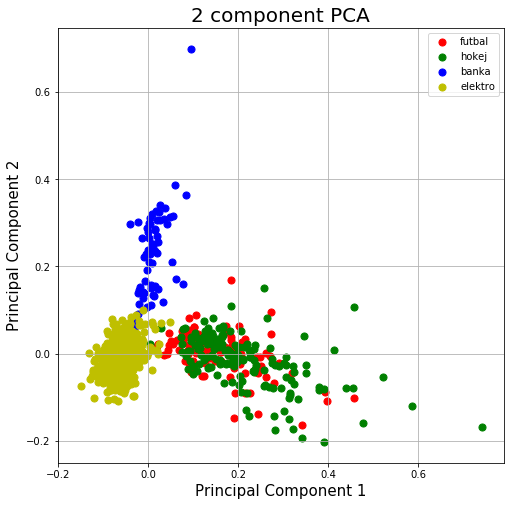

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["futbal", "hokej", "banka", "elektro"]
colors = ['r', 'g', 'b', "y"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
finalDf[finalDf["principal component 2"] > 0.6]

,principal component 1,principal component 2,words,category
266,0.095727,0.698689,banka,banka


# Document classification
https://arxiv.org/pdf/1607.01759.pdf

In [16]:
# !git clone https://github.com/facebookresearch/fastText.git models/fastText
# !pip install models/fastText/.

In [48]:
import glob
import os
import re
import pandas as pd
import fasttext
from sklearn.model_selection import train_test_split
from modules import ft_functions as ftf
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import importlib
import pickle
importlib.reload(ftf)

<module 'modules.ft_functions' from '/home/jovyan/work/DSA/modules/ft_functions.py'>

__data source:__

http://mlg.ucd.ie/datasets/bbc.html
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.
All rights, including copyright, in the content of the original articles are owned by the BBC.
Contact Derek Greene <derek.greene@ucd.ie>

## Load data

In [49]:
docs_path = "/home/jovyan/work/DSA/data/fasttext/bbc/"
folders = ["business", "entertainment", "politics", "tech", "sport"]

docs_df = pd.DataFrame(columns = ["text", "TAG"])
for folder in folders: 
    folder_list = []
    folder_path = os.path.join(docs_path, folder)
    folder_files = glob.glob(os.path.join(folder_path, "*.txt"))
    for file in folder_files:
        try:
            f = open(file)
            folder_list.append(f.read())
            f.close()
        except:
            pass
    folder_df = pd.DataFrame(folder_list, columns = ["text"])
    folder_df["TAG"] =  [folder]*folder_df.shape[0]
    docs_df = docs_df.append(folder_df, ignore_index=True)

In [50]:
print(f"Docs read: {docs_df.shape[0]}\n") 
counts = docs_df["TAG"].value_counts().to_dict()
print("Number of articles in category: \n")
[print(f" {key}: {value}") for key, value in counts.items()]
display(docs_df.sample(5))

Docs read: 2224

Number of articles in category: 

 sport: 510
 business: 510
 politics: 417
 tech: 401
 entertainment: 386


,text,TAG
1408,"Call for action on internet scam\n\nPhone companies are not doing enough to warn customers about internet ""rogue-dialling"" scams, according to premium phone line regulator Icstis.\n\nIt has receiv...",tech
1112,"Howard dismisses Tory tax fears\n\nMichael Howard has dismissed fears from some Conservatives that his plans for £4bn tax cuts are too modest.\n\nHe defended the package, saying it was a plan for ...",politics
951,"Housing plans criticised by MPs\n\n""Irreversible environmental damage"" will be caused by government plans to build more than one million homes in south-east England, MPs have warned.\n\n""Sustainab...",politics
1035,"Former NI minister Scott dies\n\nFormer Northern Ireland minister Sir Nicholas Scott has died at a London hospice, his family has announced.\n\nThe former Conservative MP for Kensington and Chelse...",politics
597,Applegate's Charity show closes\n\nUS musical Sweet Charity has cancelled its run on Broadway after poor ticket sales for its early shows.\n\nStar Christina Applegate had to pull out of pre-Broadw...,entertainment


## Train test split

In [51]:
docs_train_val, docs_test = train_test_split(docs_df, test_size = 0.2)
docs_train, docs_val = train_test_split(docs_train_val, test_size = 0.2)
 
print("number of train documents: {}".format(len(docs_train)))
print("number of validation documents: {}".format(len(docs_val)))
print("number of test documents: {}".format(len(docs_test)))
docs_train.reset_index(inplace = True)
docs_test.reset_index(inplace = True)
docs_val.reset_index(inplace = True)

number of train documents: 1423
number of validation documents: 356
number of test documents: 445


               train_freq  val_freq  test_freq
business              330        89         91
entertainment         240        64         82
politics              261        69         87
sport                 327        84         99
tech                  265        50         86


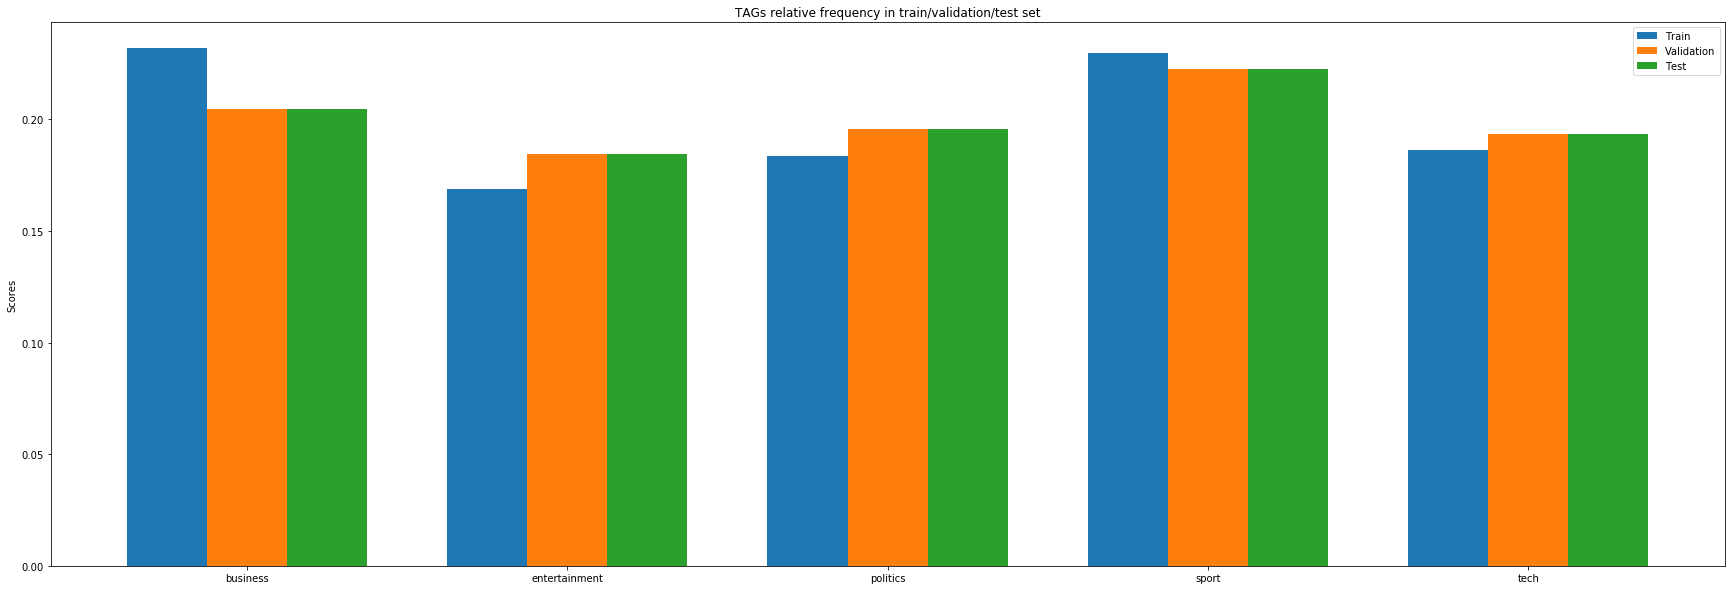

In [52]:
import importlib
importlib.reload(ftf)
plt.rcParams["figure.figsize"]=[30, 10]
ftf.plot_tag_frequencies(docs_train, docs_val, docs_test)

# Preprocess training data

#### https://fasttext.cc/docs/en/supervised-tutorial.html
- input must be a filepath
- all the labels start by the __label__ prefix, which is how fastText recognize what is a label or what is a word
- must be encoded as UTF-8

#### add prefix

In [53]:
# sample 5 row indexes
# pd.reset_option('max_colwidth')
pd.set_option('max_colwidth', 200)
sampl = docs_train.sample(5).index.values

In [54]:
label_prefix = "__label__"
df_train = docs_train.loc[:, ["TAG", "text"]].copy()
df_train["TAG"] = [label_prefix + label + "" for label in df_train["TAG"].tolist()]
df_train.iloc[sampl]

,TAG,text
835,__label__business,Mixed Christmas for US retailers\n\nUS retailers posted mixed results for December - with luxury retailers faring well while many others were forced to slash prices to lift sales.\n\nUpscale depar...
1387,__label__sport,"A year to remember for Irish\n\nThere used to be one subliminal moment during a year in Irish rugby that stood out more than most.\n\nWell, at least there used to one. Now there is a handful to lo..."
494,__label__entertainment,"Youssou N'Dour wins music prize\n\nSenegalese musician Youssou N'Dour has been named a winner of a BBC Radio 3 World Music Award.\n\nHis album Egypt won the critics' award for album of the year, w..."
1106,__label__sport,Wilkinson return 'unlikely'\n\nJonny Wilkinson looks set to miss the whole of the 2005 RBS Six Nations.\n\nEngland's World Cup-winning fly-half said last week he was hoping to recover from his lat...
848,__label__sport,Costin aims for comeback in 2006\n\nJamie Costin should be paralysed.\n\nHe says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled ...


#### remove new line __\n__ character

In [55]:
df_train["text"] = [re.sub("\n", " ", text)   for text in df_train["text"].tolist()]  
df_train.iloc[sampl]

,TAG,text
835,__label__business,Mixed Christmas for US retailers US retailers posted mixed results for December - with luxury retailers faring well while many others were forced to slash prices to lift sales. Upscale departmen...
1387,__label__sport,"A year to remember for Irish There used to be one subliminal moment during a year in Irish rugby that stood out more than most. Well, at least there used to one. Now there is a handful to look b..."
494,__label__entertainment,"Youssou N'Dour wins music prize Senegalese musician Youssou N'Dour has been named a winner of a BBC Radio 3 World Music Award. His album Egypt won the critics' award for album of the year, while..."
1106,__label__sport,Wilkinson return 'unlikely' Jonny Wilkinson looks set to miss the whole of the 2005 RBS Six Nations. England's World Cup-winning fly-half said last week he was hoping to recover from his latest ...
848,__label__sport,Costin aims for comeback in 2006 Jamie Costin should be paralysed. He says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled to s...


#### subsitute multiple white spaces with a single white space

In [56]:
df_train["text"] = [re.sub('\s{2,}', ' ', text) for text in df_train["text"].tolist()] 
df_train.iloc[sampl]

,TAG,text
835,__label__business,Mixed Christmas for US retailers US retailers posted mixed results for December - with luxury retailers faring well while many others were forced to slash prices to lift sales. Upscale department ...
1387,__label__sport,"A year to remember for Irish There used to be one subliminal moment during a year in Irish rugby that stood out more than most. Well, at least there used to one. Now there is a handful to look bac..."
494,__label__entertainment,"Youssou N'Dour wins music prize Senegalese musician Youssou N'Dour has been named a winner of a BBC Radio 3 World Music Award. His album Egypt won the critics' award for album of the year, while t..."
1106,__label__sport,Wilkinson return 'unlikely' Jonny Wilkinson looks set to miss the whole of the 2005 RBS Six Nations. England's World Cup-winning fly-half said last week he was hoping to recover from his latest in...
848,__label__sport,Costin aims for comeback in 2006 Jamie Costin should be paralysed. He says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled to ste...


#### do padding around interpunction signs

In [57]:
df_train["text"] = [re.sub('([\"\'.,!?()])', r' \1 ', text) for text in df_train["text"].tolist()]
df_train.iloc[sampl]

,TAG,text
835,__label__business,Mixed Christmas for US retailers US retailers posted mixed results for December - with luxury retailers faring well while many others were forced to slash prices to lift sales . Upscale departmen...
1387,__label__sport,"A year to remember for Irish There used to be one subliminal moment during a year in Irish rugby that stood out more than most . Well , at least there used to one . Now there is a handful to lo..."
494,__label__entertainment,Youssou N ' Dour wins music prize Senegalese musician Youssou N ' Dour has been named a winner of a BBC Radio 3 World Music Award . His album Egypt won the critics ' award for album of the year ...
1106,__label__sport,Wilkinson return ' unlikely ' Jonny Wilkinson looks set to miss the whole of the 2005 RBS Six Nations . England ' s World Cup-winning fly-half said last week he was hoping to recover from his l...
848,__label__sport,Costin aims for comeback in 2006 Jamie Costin should be paralysed . He says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled to s...


In [27]:
#     ad1["text"] = ad1["text"].str.lower() # convert upper case to lower case

In [58]:
path_train = "/home/jovyan/work/DSA/data/fasttext/articles.train" 
df_train.to_csv(path_train, encoding = "utf-8", sep=" ", header=False, index=False) #, quoting=csv.QUOTE_NONE, escapechar="-"

#### the same preprocessing with validation and test set

In [59]:
df_test = ftf.prepare_annotated_file(docs_test, save_file = False)
path_valid = "/home/jovyan/work/DSA/data/fasttext/articles.valid"
df_val = ftf.prepare_annotated_file(docs_val, save_file = True, outfile = path_valid, label_prefix = "__label__")
path_train_val = "/home/jovyan/work/DSA/data/fasttext/articles.train_val"
df_train_val = ftf.prepare_annotated_file(docs_train_val, save_file = True, outfile = path_train_val, label_prefix = "__label__")

# train model

In [60]:
path_model = "/home/jovyan/work/DSA/data/fasttext/model.bin" 
model = fasttext.train_supervised(input = path_train_val, epoch=100) # input = path_train, autotuneValidationFile=path_valid, autotuneDuration=7200 # input = path_train_val, epoch=100, autotuneMetric="f1:__label__politics", 
model.save_model(path_model)

#### with automatic hyperparameter optimization

In [ ]:
path_model = "/home/jovyan/work/DSA/data/fasttext/model_autotuned.bin" 
model = fasttext.train_supervised(input = path_train, autotuneValidationFile=path_valid, autotuneDuration=60) # input = path_train_val, epoch=100, autotuneMetric="f1:__label__politics", 
model.save_model(path_model)

# test model

In [61]:
test_set = df_test.copy()

predictions = model.predict(test_set["text"].tolist())
df_predictions = pd.DataFrame(
    {'prediction': [p[0] for p in predictions[0]],
     'confidence': [c[0] for c in predictions[1]],
     'truth':      test_set["TAG"].str.strip().tolist(),
     'text':       test_set["text"].tolist()
    })
df_predictions

,prediction,confidence,truth,text
0,__label__entertainment,0.968762,__label__entertainment,"Famed music director Viotti dies Conductor Marcello Viotti , director of Venice ' s famous La Fenice Theatre , has died in Germany at 50 . Viotti , director of La Fenice since 2002 , conducte..."
1,__label__sport,0.998814,__label__sport,Celts savour Grand Slam prospect The Six Nations has heralded a new order in northern hemisphere rugby this year and Wales and Ireland rather than traditional big guns France and England face a po...
2,__label__politics,0.984808,__label__politics,Top judge clashes with ministers The UK ' s top judge has revealed he has clashed with ministers about how the heads of public inquiries are chosen . Lord Woolf said he was determined his current...
3,__label__business,0.949321,__label__business,Salary scandal in Cameroon Cameroon says widespread corruption in its finance ministry has cost it 1bn CFA francs ( $2m; £1m ) a month . About 500 officials are accused of either awarding thems...
4,__label__tech,0.975679,__label__tech,When invention turns to innovation It is unlikely that future technological inventions are going to have the same kind of transformative impact that they did in the past . When history takes a lo...
...,...,...,...,...
440,__label__sport,0.995902,__label__sport,White admits to Balco drugs link Banned American sprinter Kelli White says she knowingly took steroids given to her by Bay Area Lab Co-Operative ( Balco ) president Victor Conte . Conte faces a...
441,__label__tech,0.640735,__label__tech,"Mobile gaming takes off in India Gaming on the move is one of the fastest-growing activities among the tech-savvy in India , says a report . The Indian mobile gaming market is expected to genera..."
442,__label__business,0.999817,__label__business,"Latin America sees strong growth Latin America ' s economy grew by 5 . 5% in 2004 , its best performance since 1980 , while exports registered their best performance in two decades . The United..."
443,__label__sport,0.999276,__label__sport,"Ajax refuse to rule out Jol move Ajax have refused to reveal whether Tottenham ' s boss Martin Jol is on the Dutch champions ' shortlist to become the Amsterdam club ' s new coach . Jol , who h..."


In [16]:
afile = open("/home/jovyan/work/DSA/data/fasttext/" + "results.pkl", "wb")
pickle.dump(df_predictions, afile)
afile.close

<function BufferedWriter.close>

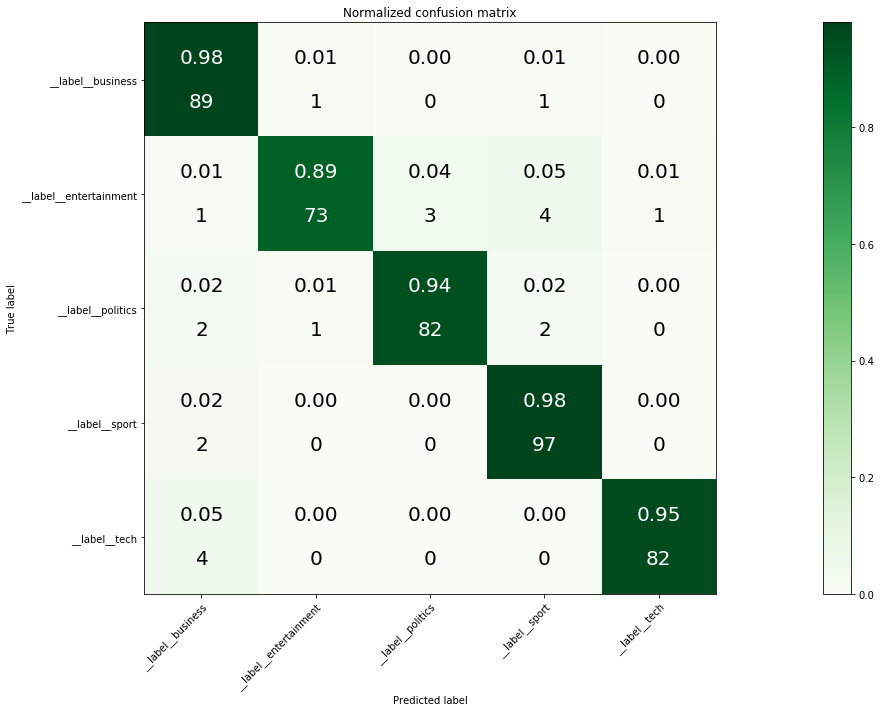

In [62]:
y_true = df_predictions["truth"]
y_pred = df_predictions["prediction"]
report = classification_report(y_true = y_true, y_pred = y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

classes = df_report.index[~df_report.index.isin(["micro avg", "macro avg", "weighted avg"])]
ftf.plot_confusion_matrix(y_true, y_pred, classes = classes, cmap = plt.cm.Greens, ft_size = 20, normalize = True)
plt.show()

In [63]:
display(df_report)

,precision,recall,f1-score,support
__label__business,0.908163,0.978022,0.941799,91.000000
__label__entertainment,0.973333,0.890244,0.929936,82.000000
__label__politics,0.964706,0.942529,0.953488,87.000000
__label__sport,0.932692,0.979798,0.955665,99.000000
__label__tech,0.987952,0.953488,0.970414,86.000000
accuracy,0.950562,0.950562,0.950562,0.950562
macro avg,0.953369,0.948816,0.950261,445.000000
weighted avg,0.952103,0.950562,0.950513,445.000000
